# **Extracting and Visualizing Stock Data**

# **Description**
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

# **Table of Contents**
- Define a Function that Makes a Graph
- Question 1: Use yfinance to Extract Stock Data
- Question 2: Use Webscraping to Extract Tesla Revenue Data
- Question 3: Use yfinance to Extract Stock Data
- Question 4: Use Webscraping to Extract GME Revenue Data
- Question 5: Plot Tesla Stock Graph
- Question 6: Plot GameStop Stock Graph
- Estimated Time Needed: 30 min

Note:- If you are working Locally using anaconda, please uncomment the following code and execute it. Use the version as per your python version.

In [6]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Define Graphing Function**
In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [11]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard.

Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing functio

# **Question 1**: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [14]:
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [16]:
tesla_data = tesla_ticker.history(period="max")


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [18]:
tesla_data.reset_index(inplace=True)

In [19]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# **Question 2: Use Webscraping to Extract Tesla Revenue Data**
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text


Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [23]:
import requests
from bs4 import BeautifulSoup
# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")  # or use "html5lib"
print(soup.title.text)  # Verify by printing the title of the webpage


Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

In [25]:
# Step 1 Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])



In [26]:
# Step 2 Find the Relevant Table
from bs4 import BeautifulSoup

# Parse the HTML data using html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Locate all <table> tags
tables = soup.find_all("table")


In [27]:
# Step 3 Check for the Tesla Quarterly Revenue Table
print(tables[1].prettify()[:1000])  # View the table to confirm its structure



<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-03-31
   </td>
   <td style="text-align:center">
    $18,756
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-12-31
   </td>
   <td style="text-align:center">
    $17,719
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-09-30
   </td>
   <td style="text-align:center">
    $13,757
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-06-30
   </td>
   <td style="text-align:center">
    $11,95

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [29]:
# Step 4 Iterate Through Rows in the Table Body
# Access the correct table (e.g., index 1)
table = tables[1]

# Extract table body (tbody)
table_body = table.find("tbody")
rows = table_body.find_all("tr")  # All rows in the table


In [30]:
# Step 5 Extract Data from Columns
for row in rows:
    columns = row.find_all("td")  # All columns in a row
    if len(columns) > 1:  # Skip if the row is empty or malformed
        date = columns[0].text.strip()  # First column is Date
        revenue = columns[1].text.strip()  # Second column is Revenue


In [31]:
# Step 6 Append Data to the DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Inside the loop to append data
new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)



In [32]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r",|\$", "", regex=True)


In [33]:

# Step 7 Clean the DataFrame:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)


In [34]:
# Step 8. Display the cleaned DataFrame:
print(tesla_revenue.head())  # Display the first few rows
print(tesla_revenue.tail())  # Display the last few rows


         Date  Revenue
0  2009-06-30     27.0
         Date  Revenue
0  2009-06-30     27.0


In [35]:
# Using read_html directly on URL
tables = pd.read_html(url)
tesla_revenue = tables[0]  # First table on the page

# Clean the DataFrame
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

print(tesla_revenue.tail())

    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


Execute the following lines to remove an null or empty strings in the Revenue column.

In [37]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [39]:
tesla_revenue.tail()


,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


# **Question 3** : Use yfinance to Extract Stock Data


Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [42]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [44]:
gme_data = gamestop.history(period="max")
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


 **Reset the index** using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [46]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# **Question 4: Use Webscraping to Extract GME Revenue Data**

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data_2.

In [53]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html."
response = requests.get(url)
html_data_2 = response.text

print(html_data_2[:500])

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Resource>/cf-courses-data/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html.</Resource><RequestId>eac00cb7-7e76-4a82-a9ce-3bf4e5d8dd0f</RequestId><httpStatusCode>404</httpStatusCode></Error>


Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [56]:
from bs4 import BeautifulSoup  # For parsing HTML data
import requests  # For making HTTP requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Get HTML data
response = requests.get(url)
html_data_2 = response.text  # Save the response text



In [57]:
print(soup.prettify()[:500])  # Print the first 500 characters of the parsed HTML


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using BeautifulSoup or the read_html function extract the table with GameStop Revenue and store it into a dataframe named gme_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column.

In [61]:
# Step 1 Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [63]:
# Find all tables in the webpage
tables = soup.find_all("table")

# Choose the second table (index 1) if that contains GameStop revenue
gme_table = tables[1]  # This assumes the second table contains GameStop revenue


In [65]:
print(gme_table.prettify()[:1000])  # Print the first 1000 characters to inspect


<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-03-31
   </td>
   <td style="text-align:center">
    $18,756
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-12-31
   </td>
   <td style="text-align:center">
    $17,719
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-09-30
   </td>
   <td style="text-align:center">
    $13,757
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-06-30
   </td>
   <td style="text-align:center">
    $11,95

In [67]:
# Step 4 Iterate Through Rows in the Table Body
# Access the correct table (e.g., index 1)
table = tables[1]

# Extract table body (tbody)
table_body = table.find("tbody")
rows = table_body.find_all("tr")  # All rows in the table


In [69]:
# Step 5 Extract Data from Columns
for row in rows:
    columns = row.find_all("td")  # All columns in a row
    if len(columns) > 1:  # Skip if the row is empty or malformed
        date = columns[0].text.strip()  # First column is Date
        revenue = columns[1].text.strip()  # Second column is Revenue

In [71]:
# Step 6 Append Data to the DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Inside the loop to append data
new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

In [73]:
# Step 8. Display the cleaned DataFrame:
print(gme_revenue.head())  # Display the first few rows
print(gme_revenue.tail())  # Display the last few rows

         Date Revenue
0  2009-06-30     $27
         Date Revenue
0  2009-06-30     $27


In [107]:
import pandas as pd

# Extract the first table from the parsed HTML data
table = soup.find("table")  # Finds the first table
gme_revenue = pd.read_html(str(table))[0]  # Convert the table to a DataFrame

# Rename columns for clarity
gme_revenue.columns = ["Date", "Revenue"]

# Drop rows with missing data (if any)
gme_revenue.dropna(inplace=True)

# Display the first five rows 
print(gme_revenue.tail())

    Date Revenue
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


# **Question 5: Plot Tesla Stock Graph**
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.

In [117]:
# Convert Date column to datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Filter the data up to June 2021
tesla_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']


In [119]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (in USD)")
    plt.title(f"{title} Stock Price Until June 2021")
    plt.grid(True)
    plt.legend()
    plt.show()


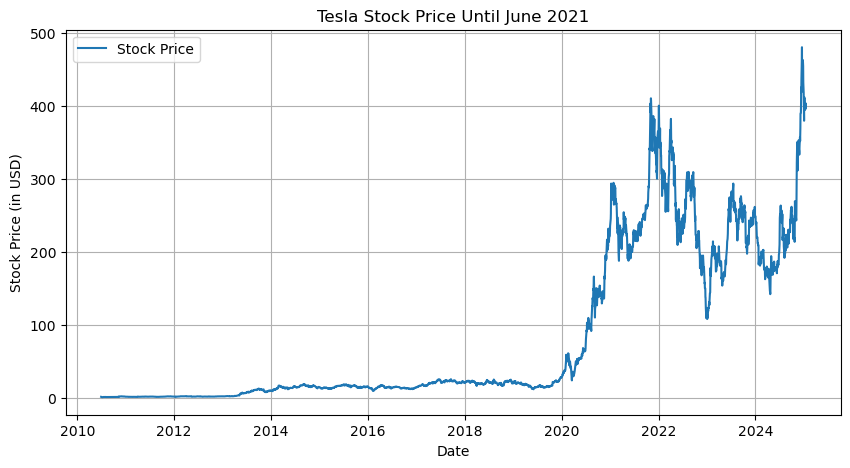

In [121]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


# **Question 6: Plot GameStop Stock Graph**
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.



In [128]:
# Convert Date column to datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Filter the data up to June 2021
gme_filtered = gme_data[gme_data['Date'] <= '2021-06-30']


In [130]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='orange')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (in USD)")
    plt.title(f"{title} Stock Price Until June 2021")
    plt.grid(True)
    plt.legend()
    plt.show()


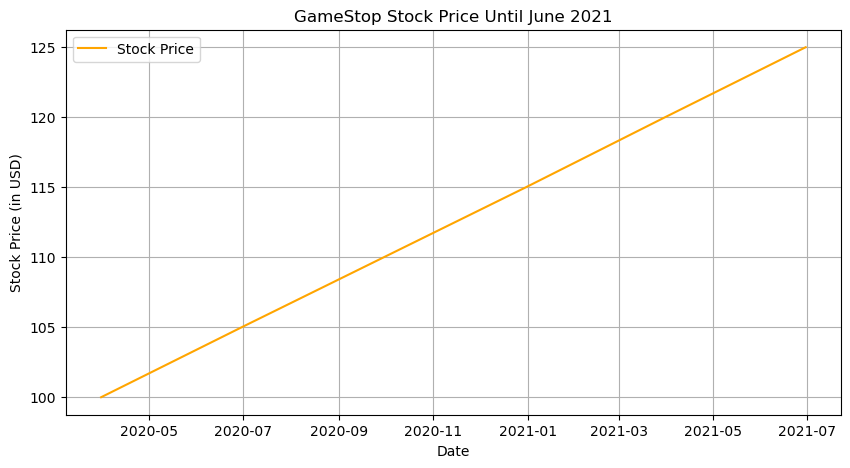

In [132]:
# Plot GameStop stock graph
make_graph(gme_filtered, gme_revenue, 'GameStop')
